In [2]:
#coding=utf-8
from numpy import *

'''通过方差的百分比来计算将数据降到多少维是比较合适的，
函数传入的参数是特征值和百分比percentage，返回需要降到的维度数num'''
def eigValPct(eigVals,percentage):
    sortArray=sort(eigVals) #使用numpy中的sort()对特征值按照从小到大排序
    sortArray=sortArray[-1::-1] #特征值从大到小排序
    arraySum=sum(sortArray) #数据全部的方差arraySum
    tempSum=0
    num=0
    for i in sortArray:
        tempSum+=i
        num+=1
        if tempsum>=arraySum*percentage:
            return num

'''pca函数有两个参数，其中dataMat是已经转换成矩阵matrix形式的数据集，列表示特征；
其中的percentage表示取前多少个特征需要达到的方差占比，默认为0.9'''
def pca(dataMat,percentage=0.9):
    meanVals=mean(dataMat,axis=0)  #对每一列求平均值，因为协方差的计算中需要减去均值
    meanRemoved=dataMat-meanVals
    covMat=cov(meanRemoved,rowvar=0)  #cov()计算方差
    eigVals,eigVects=linalg.eig(mat(covMat))  #利用numpy中寻找特征值和特征向量的模块linalg中的eig()方法
    k=eigValPct(eigVals,percentage) #要达到方差的百分比percentage，需要前k个向量
    eigValInd=argsort(eigVals)  #对特征值eigVals从小到大排序
    eigValInd=eigValInd[:-(k+1):-1] #从排好序的特征值，从后往前取k个，这样就实现了特征值的从大到小排列
    redEigVects=eigVects[:,eigValInd]   #返回排序后特征值对应的特征向量redEigVects（主成分）
    lowDDataMat=meanRemoved*redEigVects #将原始数据投影到主成分上得到新的低维数据lowDDataMat
    reconMat=(lowDDataMat*redEigVects.T)+meanVals   #得到重构数据reconMat
    return lowDDataMat,reconMat

[[ 0.69  0.49]
 [-1.31 -1.21]
 [ 0.39  0.99]
 [ 0.09  0.29]
 [ 1.29  1.09]
 [ 0.49  0.79]
 [ 0.19 -0.31]
 [-0.81 -0.81]
 [-0.31 -0.31]
 [-0.71 -1.01]]
[[ 0.61655556  0.61544444]
 [ 0.61544444  0.71655556]]
[[ 5.549  5.539]
 [ 5.539  6.449]]
[ 0.0490834   1.28402771] [[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


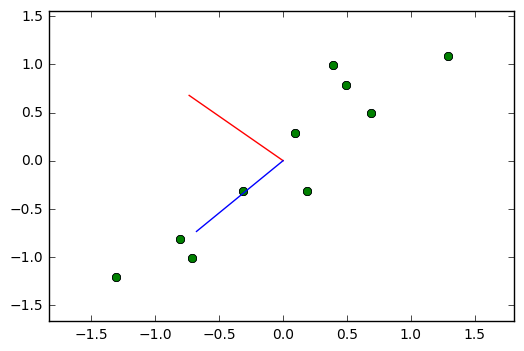

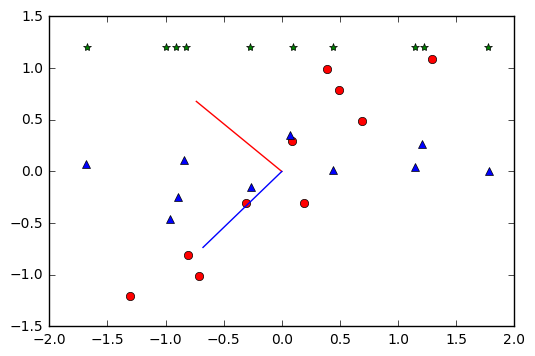

In [22]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1])
y=np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])
# Step 1: 求平均值以及做normalization
mean_x=np.mean(x)
mean_y=np.mean(y)
scaled_x=x-mean_x
scaled_y=y-mean_y
data=np.matrix([[scaled_x[i],scaled_y[i]] for i in range(len(scaled_x))])
print(data)
plt.plot(scaled_x,scaled_y,'o')
# Step 2: 求协方差矩阵(Covariance Matrix)
# 假设n为数据的特征数，那么协方差矩阵M, 为一个n*n的矩阵，其中Mij为第i和第j个特征的协方差，对角线是各个特征的方差。
cov=np.cov(scaled_x,scaled_y)
print(cov)
#散度矩阵 Scatter Matrix
#其实协方差矩阵和散度矩阵关系密切，散度矩阵 就是协方差矩阵乘以（总数据量-1）。因此他们的特征根和特征向量是一样的。
#这里值得注意的一点就是，散度矩阵是SVD奇异值分解的一步，因此PCA和SVD是有很大联系。
sct=np.dot(np.transpose(data),data)
print(sct)
#Step 3: 求协方差矩阵的特征根和特征向量
eig_val, eig_vec = np.linalg.eig(cov)
print(eig_val,eig_vec)
plt.plot(scaled_x,scaled_y,'o',)
xmin ,xmax = scaled_x.min(), scaled_x.max()
ymin, ymax = scaled_y.min(), scaled_y.max()
dx = (xmax - xmin) * 0.2
dy = (ymax - ymin) * 0.2
plt.xlim(xmin - dx, xmax + dx)
plt.ylim(ymin - dy, ymax + dy)
plt.plot([eig_vec[:,0][0],0],[eig_vec[:,0][1],0],color='red')
plt.plot([eig_vec[:,1][0],0],[eig_vec[:,1][1],0],color='blue')
plt.show()
new_data=np.transpose(np.dot(eig_vec,np.transpose(data)))
#Step 4: 选择主要成分
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]
eig_pairs.sort(reverse=True)
feature=eig_pairs[0][1]
#Step 5: 转化得到降维的数据
new_data_reduced=np.transpose(np.dot(feature,np.transpose(data)))
plt.plot(scaled_x,scaled_y,'o',color='red')
plt.plot([eig_vec[:,0][0],0],[eig_vec[:,0][1],0],color='red')
plt.plot([eig_vec[:,1][0],0],[eig_vec[:,1][1],0],color='blue')
plt.plot(new_data[:,0],new_data[:,1],'^',color='blue')
plt.plot(new_data_reduced[:,0],[1.2]*10,'*',color='green')
plt.show()

In [30]:
import numpy as np
def pca(X,k):#k is the components you want
    #mean of each feature
    n_samples, n_features = X.shape
    mean=np.array([np.mean(X[:,i]) for i in range(n_features)])  #normalization
    norm_X=X-mean  #scatter matrix
    scatter_matrix=np.dot(np.transpose(norm_X),norm_X)  #Calculate the eigenvectors and eigenvalues
    eig_val, eig_vec = np.linalg.eig(scatter_matrix)
    eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(n_features)]  # sort eig_vec based on eig_val from highest to lowest
    eig_pairs.sort(reverse=True)  # select the top k eig_vec
    feature=np.array([ele[1] for ele in eig_pairs[:k]])  #get new data
    data=np.dot(norm_X,np.transpose(feature)) 
    return data

from sklearn.decomposition import PCA
X = np.array([[-1, 1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

pca = pca(X,1)
print('array(',pca,')')

pca=PCA(n_components=1)
pca.fit(X)
pca.transform(X)

array( [[-0.50917706]
 [-2.40151069]
 [-3.7751606 ]
 [ 1.20075534]
 [ 2.05572155]
 [ 3.42937146]] )


array([[-0.50917707],
       [-2.40151076],
       [-3.77516072],
       [ 1.20075537],
       [ 2.0557216 ],
       [ 3.42937155]])